In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots prettier
sns.set(style='whitegrid')


Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv('../data/raw/CDR-Call-Details.csv') 
df.head()


,Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,isFraud
0,382-4657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,371-7191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,358-1921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,375-9999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,330-6626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101174 entries, 0 to 101173
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Phone Number    101174 non-null  object 
 1   Account Length  101174 non-null  int64  
 2   VMail Message   101174 non-null  int64  
 3   Day Mins        101174 non-null  float64
 4   Day Calls       101174 non-null  int64  
 5   Day Charge      101174 non-null  float64
 6   Eve Mins        101174 non-null  float64
 7   Eve Calls       101174 non-null  int64  
 8   Eve Charge      101174 non-null  float64
 9   Night Mins      101174 non-null  float64
 10  Night Calls     101174 non-null  int64  
 11  Night Charge    101174 non-null  float64
 12  Intl Mins       101174 non-null  float64
 13  Intl Calls      101174 non-null  int64  
 14  Intl Charge     101174 non-null  float64
 15  CustServ Calls  101174 non-null  int64  
 16  isFraud         101174 non-null  bool   
dtypes: bool(1)

In [7]:
df.describe

<bound method NDFrame.describe of        Phone Number  Account Length  VMail Message  Day Mins  Day Calls  \
0          382-4657             128             25     265.1        110   
1          371-7191             107             26     161.6        123   
2          358-1921             137              0     243.4        114   
3          375-9999              84              0     299.4         71   
4          330-6626              75              0     166.7        113   
...             ...             ...            ...       ...        ...   
101169     789-9756             222              0     228.2         60   
101170     798-5885              88              0     282.2        222   
101171     798-5798              22              0     222.2         62   
101172     999-9897             228              0     222.0         99   
101173     786-7589             228              0     226.2         98   

        Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  

In [8]:
df.isnull().sum()

Phone Number      0
Account Length    0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
isFraud           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(40729)

In [10]:
df = df.drop_duplicates().reset_index(drop=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['isFraud'].value_counts()

isFraud
False    53768
True      6677
Name: count, dtype: int64

In [13]:
df.to_csv('../data/cleaned/fraudTest_cleaned.csv', index=False)

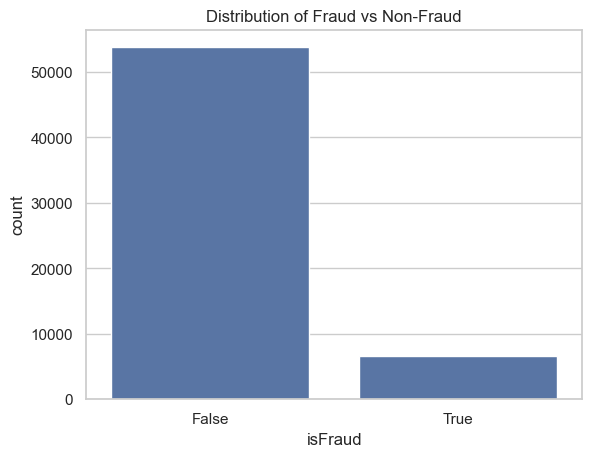

In [15]:
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraud vs Non-Fraud')
plt.show()

In [16]:
fraud_ratio = df['isFraud'].value_counts(normalize=True) * 100
print(fraud_ratio)

isFraud
False    88.953594
True     11.046406
Name: proportion, dtype: float64


In [17]:
df.nunique()

Phone Number      7467
Account Length     322
VMail Message       72
Day Mins          2548
Day Calls          221
Day Charge        2873
Eve Mins          2523
Eve Calls          224
Eve Charge        2221
Night Mins        2464
Night Calls        218
Night Charge      1470
Intl Mins          267
Intl Calls          39
Intl Charge        339
CustServ Calls      11
isFraud              2
dtype: int64

In [18]:
df.drop(columns=['Phone Number'], inplace=True)

In [19]:
df.to_csv('../data/cleaned/fraud_ready.csv', index=False)

In [20]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify ensures class balance
)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')  # handles class imbalance

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10428   326]
 [  376   959]]
              precision    recall  f1-score   support

       False       0.97      0.97      0.97     10754
        True       0.75      0.72      0.73      1335

    accuracy                           0.94     12089
   macro avg       0.86      0.84      0.85     12089
weighted avg       0.94      0.94      0.94     12089



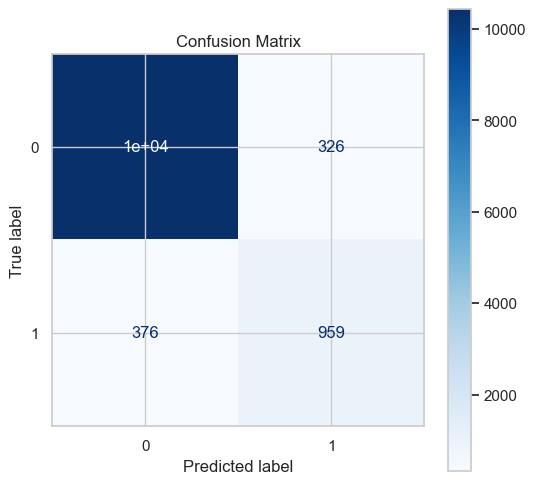

In [34]:
import os
os.makedirs("figures", exist_ok=True)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)  # ✅ Use rf instead of model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap="Blues")
plt.title("Confusion Matrix")
plt.savefig("figures/confusion_matrix.png")
plt.show()

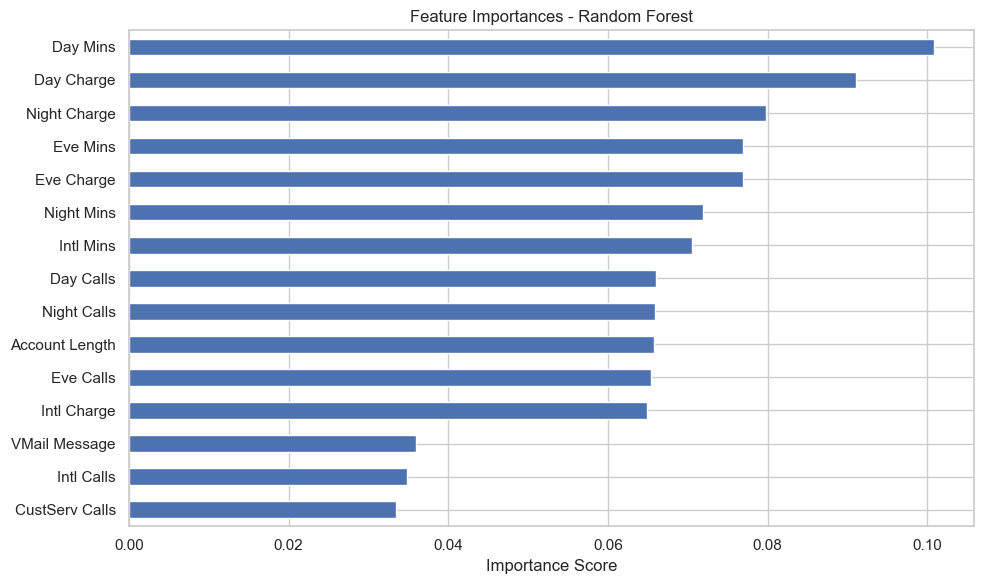

<Figure size 640x480 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance plot
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()
plt.savefig("figures/feature_importance.png")

In [26]:
import os

os.makedirs('data/cleaned', exist_ok=True)
os.makedirs('results', exist_ok=True)

In [27]:
df.to_csv('data/cleaned/fraud_ready.csv', index=False)

In [28]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).to_csv('results/feature_importances.csv')

In [29]:
from sklearn.metrics import classification_report
import json

report = classification_report(y_test, y_pred, output_dict=True)

with open('results/classification_report.json', 'w') as f:
    json.dump(report, f, indent=4)